In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
!nvidia-smi

Tue May 11 04:45:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
%cd project

/content/drive/My Drive/Colab Notebooks/datasets/darknet/project


In [8]:
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg

--2021-05-11 04:55:16--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov3-tiny.cfg’

yolov3-tiny.cfg         [ <=>                ] 145.94K  --.-KB/s    in 0.02s   

2021-05-11 04:55:16 (6.22 MB/s) - ‘yolov3-tiny.cfg’ saved [149444]



In [3]:
!tar -xzvf /content/drive/My\ Drive/Colab\ Notebooks/datasets/darknet/cudnn/cudnn-11.3-linux-x64-v8.2.0.53.solitairetheme8 -C /usr/local/

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_infer_v8.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_adv_train_v8.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_backend_v8.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_infer_v8.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_cnn_train_v8.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_infer_v8.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_ops_train_v8.h
cuda/include/cudnn_v8.h
cuda/include/cudnn_version.h
cuda/include/cudnn_version_v8.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.2.0
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.2.0
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.2.0
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.2.0
cuda/lib64/

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/datasets/darknet

/content/drive/MyDrive/Colab Notebooks/datasets/darknet


In [5]:
!chmod 775 darknet

In [11]:
%cd ..

/content/drive/MyDrive/Colab Notebooks/datasets/darknet


In [14]:
%%time
!./darknet detector train data/obj.data project/yolo-obj.cfg project/darknet19_448.conv.23 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Region Avg IOU: 0.885843, Class: 1.000000, Obj: 0.900555, No Obj: 0.004079, Avg Recall: 1.000000,  count: 15
Region Avg IOU: 0.863713, Class: 1.000000, Obj: 0.863539, No Obj: 0.012420, Avg Recall: 1.000000,  count: 53
Region Avg IOU: 0.814314, Class: 1.000000, Obj: 0.835583, No Obj: 0.008869, Avg Recall: 1.000000,  count: 49

 6790: 0.139418, 0.140375 avg loss, 0.001000 rate, 0.952418 seconds, 434560 images, 10.419724 hours left
Loaded: 0.000048 seconds
Region Avg IOU: 0.814356, Class: 1.000000, Obj: 0.817696, No Obj: 0.011852, Avg Recall: 0.932203,  count: 59
Region Avg IOU: 0.706245, Class: 1.000000, Obj: 0.691802, No Obj: 0.011894, Avg Recall: 0.843137,  count: 102
Region Avg IOU: 0.802058, Class: 1.000000, Obj: 0.796199, No Obj: 0.013166, Avg Recall: 0.923077,  count: 65
Region Avg IOU: 0.704262, Class: 1.000000, Obj: 0.689765, No Obj: 0.009934, Avg Recall: 0.769231,  count: 65
Region Avg IOU: 0.837580, Class: 1.000000, Obj: 0.845754, No Obj: 0.0

In [16]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation =cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

def download(path):
  from google.colab import files
  files.download(path)

In [15]:
!pwd

/content/drive/My Drive/Colab Notebooks/datasets/darknet


In [ ]:
# %cd content
from google.colab import files
loaded = files.upload()

Saving size_edit.jpg to size_edit.jpg


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/datasets/darknet

/content/drive/MyDrive/Colab Notebooks/datasets/darknet


In [20]:
!./darknet detector test data/obj.data project/yolo-obj.cfg backup/yolo-obj_last.weights project/test_img/test_flek.jpg

 CUDA-version: 11000 (11020), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

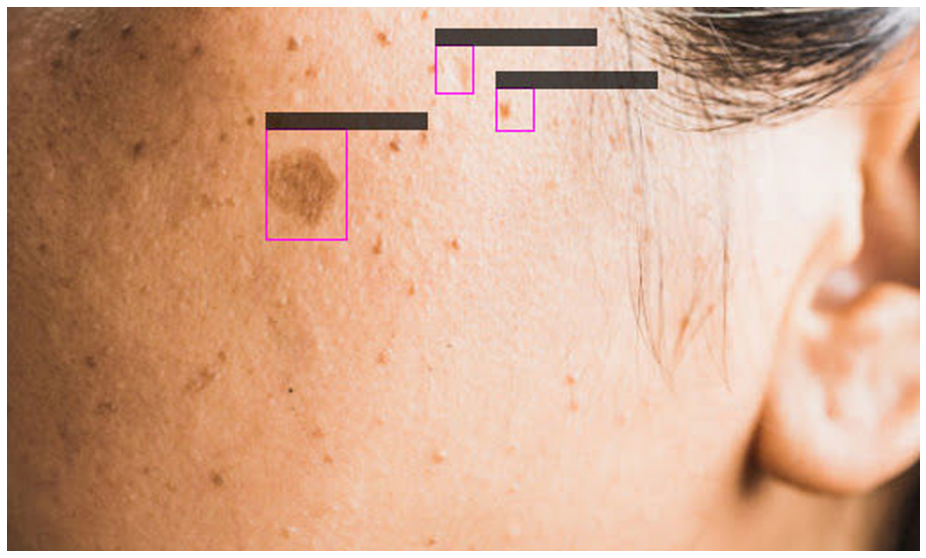

In [21]:
imShow('predictions.jpg')

In [22]:
!./darknet detector test data/obj.data project/yolo-obj.cfg backup/yolo-obj_last.weights project/test_img/test2_flek.jpg

 CUDA-version: 11000 (11020), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

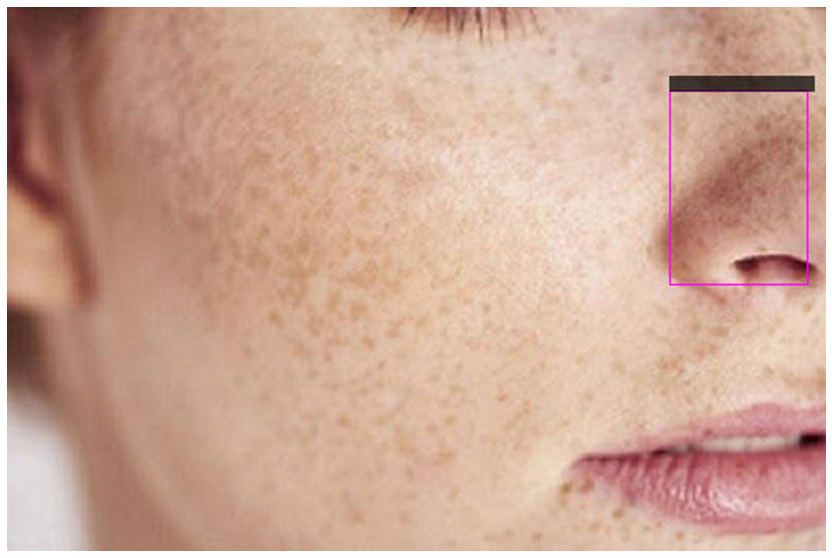

In [23]:
imShow('predictions.jpg')

In [24]:
!./darknet detector test data/obj.data project/yolo-obj.cfg backup/yolo-obj_last.weights project/test_img/test3_flek.jpg

 CUDA-version: 11000 (11020), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

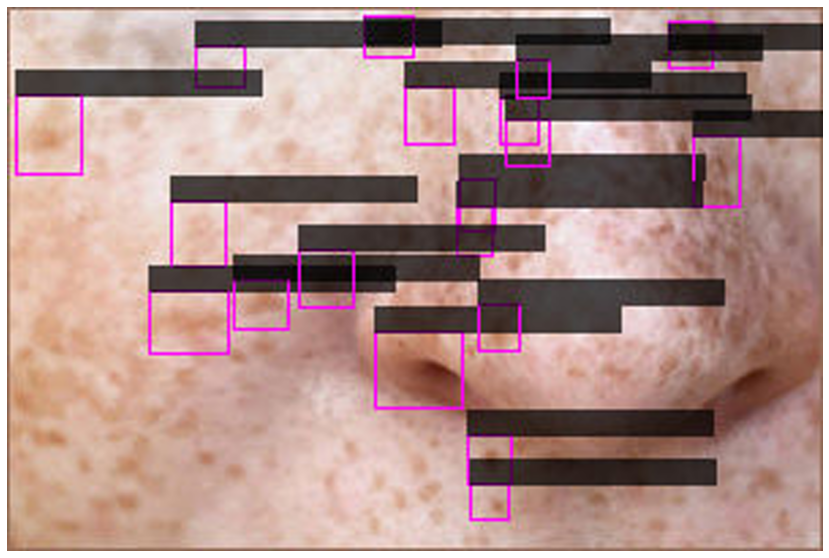

In [25]:
imShow('predictions.jpg')

In [26]:
!./darknet detector test data/obj.data project/yolo-obj.cfg backup/yolo-obj_last.weights project/test_img/test4_flek.jpg

 CUDA-version: 11000 (11020), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

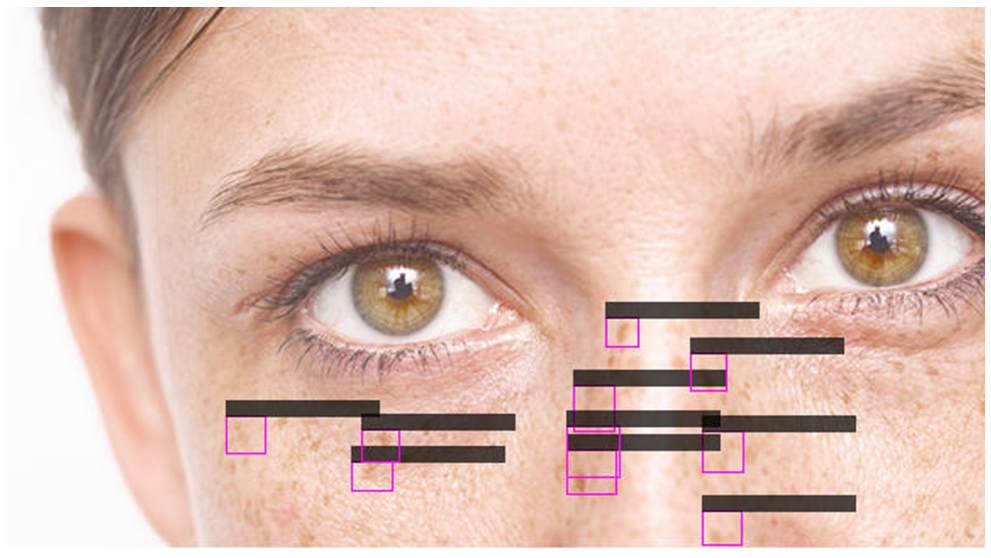

In [27]:
imShow('predictions.jpg')